In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive"


 12_VaishnaviBadjate.pdf
 1715762313456125022385955694780.jpg
 17275814188622547973490665561327.jpg
 1727581879221603829965506949056.jpg
 17357227649312641130131794109447.jpg
 20241120_163531.jpg
 21sept.gdoc
 405f040f-cd2a-4a1e-a691-3699b984a122.pdf
 4c2cd637-39d3-4964-b974-a6ea7d55df06.pdf
'ACESProFest2k24 Feedback.gform'
'AI-BASED PRODUCT IMPROVEMENT PROJECT'
'Application Status-Rejected (III) 06-11-23.pdf'
 assignment1.py
 Assiment-5.gdoc
 assinment2.py
 Badjate.pdf
'Colab Notebooks'
 college_classification_clustering.ipynb
 College_Details.gsheet
'Dataset 5.zip'
'downloadfile (1).PDF'
 downloadfile.PDF
 Explain_20_Sudoku.pdf
'Godrej Testimonials'
'Here are the answers in simple and short form-.gdoc'
'Hyperspectral Imaging Workshop'
'Image to PDF 20250201 22.47.01.pdf'
 IMG_20220119_220051nidhu.jpg
 IMG_20220601_213638nidhu.jpg
 IMG-20230412-WA0049.jpg
 IMG-20231025-WA0081.jpg
 IMG-20240929-WA0014.jpg
 IMG-20241124-WA0004.jpg
'IMG-20241124-WA0005 (1).jpg'
 IMG-20241124-WA0005.jpg
'

In [ ]:
!ls "/content/drive/My Drive/Dataset 5.zip"


'/content/drive/My Drive/Dataset 5.zip'


In [ ]:
!unzip "/content/drive/My Drive/Dataset 5.zip" -d "/content/dataset"
#Run the Unzip Command
#After running the correct command, the dataset will be extracted to /content/dataset.



Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/dataset1/train/0_normal/train_normal_ (671).jpg  
  inflating: /content/dataset/dataset1/train/0_normal/train_normal_ (657).jpg  
  inflating: /content/dataset/dataset1/train/0_normal/train_normal_ (641).jpg  
  inflating: /content/dataset/dataset1/val/1_ulcerative_colitis/val_ulcer_ (385).jpg  
  inflating: /content/dataset/dataset1/train/2_polyps/train_polyps_ (87).jpg  
  inflating: /content/dataset/dataset1/val/1_ulcerative_colitis/val_ulcer_ (347).jpg  
  inflating: /content/dataset/dataset1/test/2_polyps/test_polyps_ (108).jpg  
  inflating: /content/dataset/dataset1/test/2_polyps/test_polyps_ (127).jpg  
  inflating: /content/dataset/dataset1/test/2_polyps/test_polyps_ (129).jpg  
  inflating: /content/dataset/dataset1/train/0_normal/train_normal_ (708).jpg  
  inflating: /content/dataset/dataset1/train/0_normal/train_normal_ (681).jpg  
  inflating: /content/dataset/dataset1/train/2_polyps/train_po

In [ ]:
#Check if Files are Extracted Properly
#After unzipping, verify with:

!ls "/content/dataset"

dataset1


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
import os
train_dir = r"/content/dataset/dataset1"
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Directory does not exist: {train_dir}")


FileNotFoundError: Directory does not exist: /content/dataset/dataset1

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


In [ ]:
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)


In [ ]:
# Load dataset
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [ ]:
image_vectors = []
for img, _ in train_dataset:
    img = img.view(-1).numpy()  # Flatten the image
    image_vectors.append(img)
image_vectors = np.array(image_vectors)

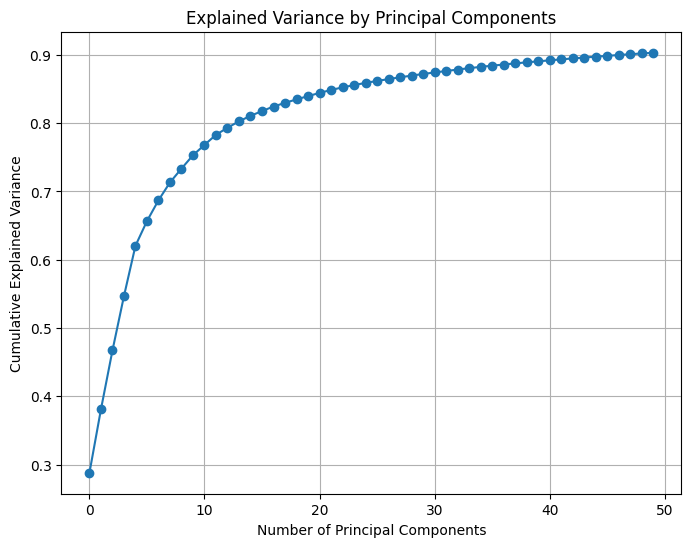

In [ ]:
pca = PCA(n_components=50)  # Reduce to 50 dimensions
pca_features = pca.fit_transform(image_vectors)

# Plot explained variance
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler  # ✅ Import StandardScaler


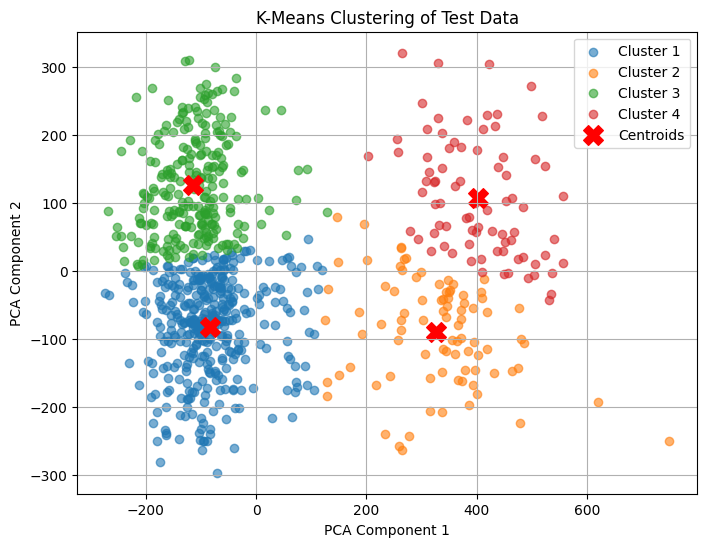

In [ ]:

# Set test data path
test_dir = r"/content/dataset/dataset1/test"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Convert images into feature vectors
image_vectors = []
for img, _ in test_dataset:
    img = img.view(-1).numpy()  # Flatten the image
    image_vectors.append(img)

# Convert list to numpy array
image_vectors = np.array(image_vectors)

# ✅ Standardize the features (Fixing NameError)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(image_vectors)

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)  # Reduce to 2D
pca_features = pca.fit_transform(scaled_features)

# Apply K-Means Clustering
k = 4  # Set the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_features)

# Plot the Clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(pca_features[clusters == i, 0], pca_features[clusters == i, 1], label=f'Cluster {i+1}', alpha=0.6)

# Mark cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker="X", s=200, c="red", label="Centroids")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering of Test Data")
plt.legend()
plt.grid()
plt.show()

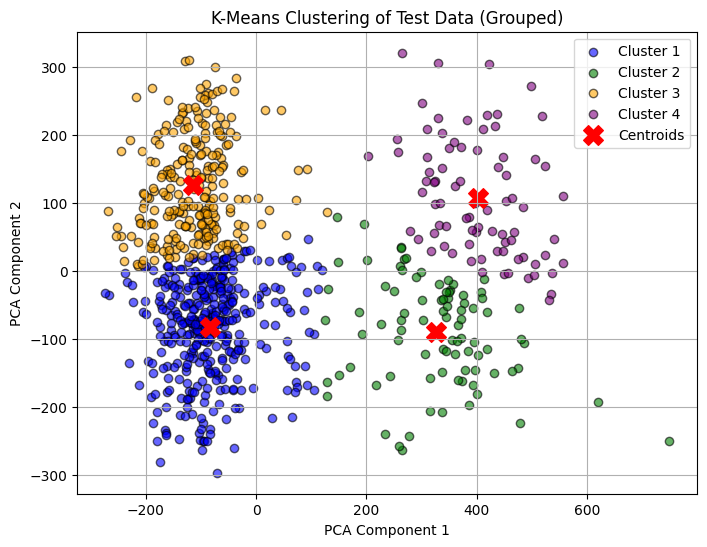

In [ ]:


# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Convert images into feature vectors
image_vectors = []
labels = []
for img, label in test_dataset:
    img = img.view(-1).numpy()  # Flatten the image
    image_vectors.append(img)
    labels.append(label)

# Convert list to numpy array
image_vectors = np.array(image_vectors)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(image_vectors)

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)  # Reduce to 2D for plotting
pca_features = pca.fit_transform(scaled_features)

# Apply K-Means Clustering
k = 4  # Set the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_features)

# Plot the Clusters with Grouping
plt.figure(figsize=(8, 6))

# Define unique colors for clusters
colors = ['blue', 'green', 'orange', 'purple']
cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

for i in range(k):
    plt.scatter(pca_features[clusters == i, 0], pca_features[clusters == i, 1],
                color=colors[i], label=cluster_names[i], alpha=0.6, edgecolors='black')

# Mark cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker="X", s=200, c="red", label="Centroids")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering of Test Data (Grouped)")
plt.legend()
plt.grid()
plt.show()

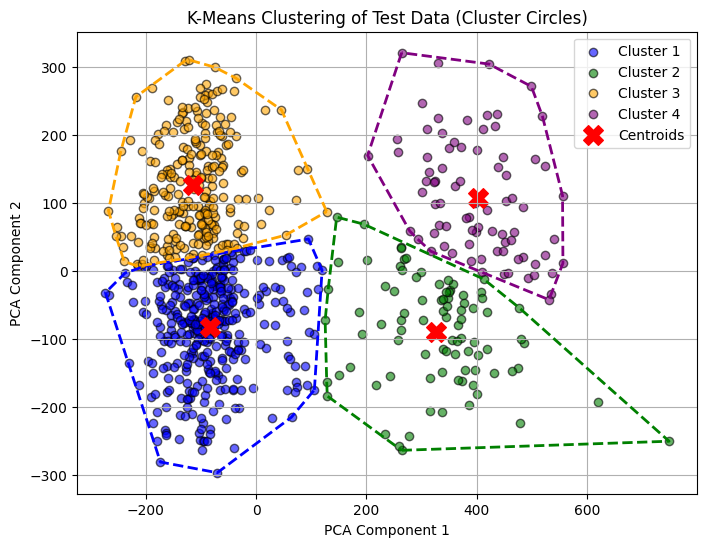

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import ConvexHull

# Set test data path
test_dir = r"/content/dataset/dataset1/test"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Convert images into feature vectors
image_vectors = []
labels = []
for img, label in test_dataset:
    img = img.view(-1).numpy()  # Flatten the image
    image_vectors.append(img)
    labels.append(label)

# Convert list to numpy array
image_vectors = np.array(image_vectors)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(image_vectors)

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)  # Reduce to 2D for plotting
pca_features = pca.fit_transform(scaled_features)

# Apply K-Means Clustering
k = 4  # Set the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_features)

# Plot the Clusters with Circles
plt.figure(figsize=(8, 6))

# Define unique colors for clusters
colors = ['blue', 'green', 'orange', 'purple']
cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

for i in range(k):
    # Get all points belonging to this cluster
    cluster_points = pca_features[clusters == i]

    # Scatter plot for cluster points
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                color=colors[i], label=cluster_names[i], alpha=0.6, edgecolors='black')

    # Draw a convex hull (circle around cluster)
    if len(cluster_points) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_points)
        hull_points = np.append(hull.vertices, hull.vertices[0])  # Close the shape
        plt.plot(cluster_points[hull_points, 0], cluster_points[hull_points, 1],
                 linestyle="dashed", color=colors[i], linewidth=2)

# Mark cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker="X", s=200, c="red", label="Centroids")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering of Test Data (Cluster Circles)")
plt.legend()
plt.grid()
plt.show()


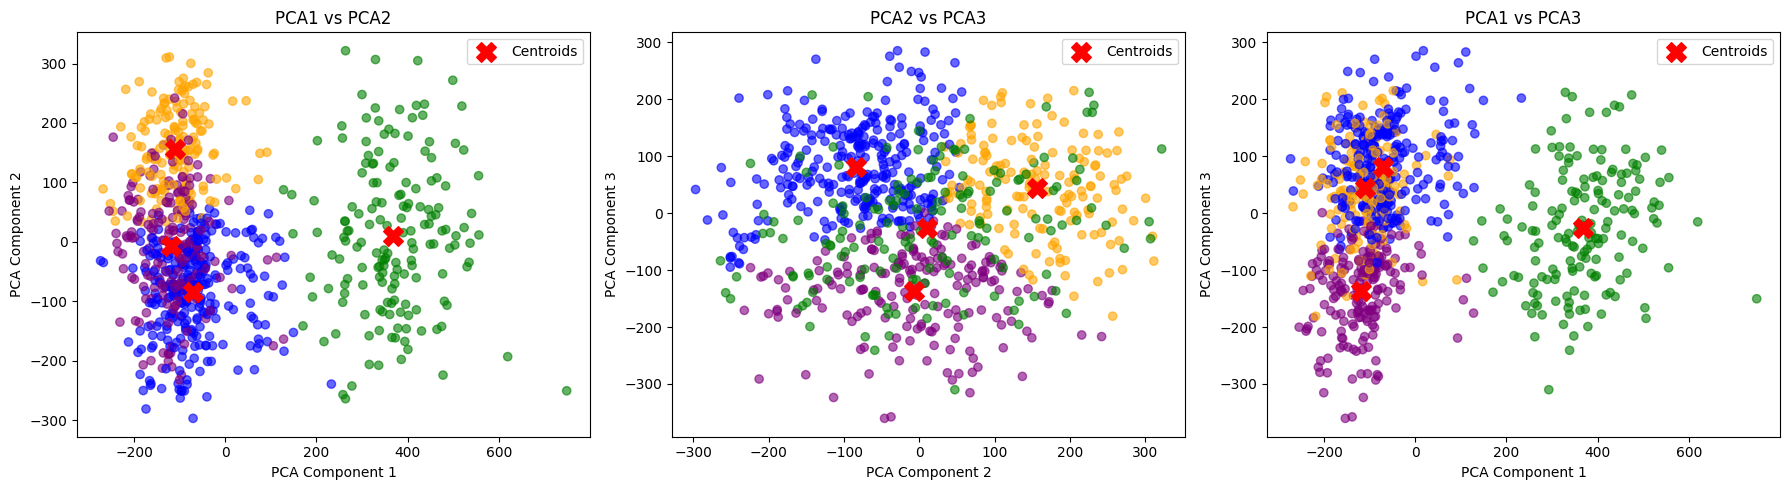

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Set test data path
test_dir = r"/content/dataset/dataset1/test"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Convert images into feature vectors
image_vectors = []
for img, _ in test_dataset:
    img = img.view(-1).numpy()  # Flatten the image
    image_vectors.append(img)

# Convert list to numpy array
image_vectors = np.array(image_vectors)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(image_vectors)

# Apply PCA (Reduce to 3D for better visualization)
pca = PCA(n_components=3)  # Reduce to 3 principal components
pca_features = pca.fit_transform(scaled_features)

# Apply K-Means Clustering
k = 4  # Set the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_features)

# Define cluster colors
colors = ['blue', 'green', 'orange', 'purple']
cluster_colors = [colors[label] for label in clusters]

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot PCA1 vs PCA2
axes[0].scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_colors, alpha=0.6)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", s=200, c="red", label="Centroids")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")
axes[0].set_title("PCA1 vs PCA2")
axes[0].legend()

# Plot PCA2 vs PCA3
axes[1].scatter(pca_features[:, 1], pca_features[:, 2], c=cluster_colors, alpha=0.6)
axes[1].scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker="X", s=200, c="red", label="Centroids")
axes[1].set_xlabel("PCA Component 2")
axes[1].set_ylabel("PCA Component 3")
axes[1].set_title("PCA2 vs PCA3")
axes[1].legend()

# Plot PCA1 vs PCA3
axes[2].scatter(pca_features[:, 0], pca_features[:, 2], c=cluster_colors, alpha=0.6)
axes[2].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], marker="X", s=200, c="red", label="Centroids")
axes[2].set_xlabel("PCA Component 1")
axes[2].set_ylabel("PCA Component 3")
axes[2].set_title("PCA1 vs PCA3")
axes[2].legend()

plt.tight_layout()
plt.show()


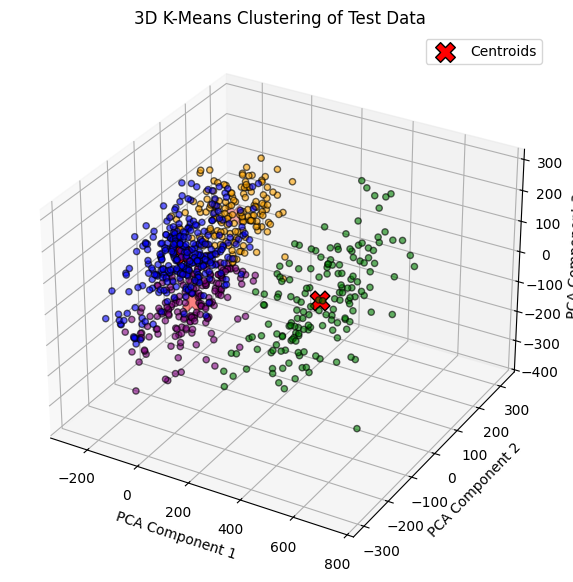

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Set test data path
test_dir = r"/content/dataset/dataset1/test"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Convert images into feature vectors
image_vectors = []
for img, _ in test_dataset:
    img = img.view(-1).numpy()  # Flatten the image
    image_vectors.append(img)

# Convert list to numpy array
image_vectors = np.array(image_vectors)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(image_vectors)

# Apply PCA (Reduce to 3D)
pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)

# Apply K-Means Clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_features)

# Define cluster colors
colors = ['blue', 'green', 'orange', 'purple']
cluster_colors = [colors[label] for label in clusters]

# Create 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot clusters
ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], c=cluster_colors, alpha=0.6, edgecolors='k')

# Plot cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           marker="X", s=200, c="red", label="Centroids", edgecolors='black')

# Labels and title
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D K-Means Clustering of Test Data")

# Show legend
ax.legend()
plt.show()


In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Set test data path
test_dir = r"/content/dataset/dataset1/test"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Convert images into feature vectors
image_vectors = []
for img, _ in test_dataset:
    img = img.view(-1).numpy()  # Flatten the image
    image_vectors.append(img)

# Convert list to numpy array
image_vectors = np.array(image_vectors)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(image_vectors)

# Apply PCA (Reduce to 3D)
pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)

# Apply K-Means Clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_features)

# Define cluster colors
colors = ['blue', 'green', 'orange', 'purple']
cluster_colors = [colors[label] for label in clusters]

# Create interactive 3D scatter plot
fig = go.Figure()

# Add clustered data points
fig.add_trace(go.Scatter3d(
    x=pca_features[:, 0],
    y=pca_features[:, 1],
    z=pca_features[:, 2],
    mode='markers',
    marker=dict(size=5, color=clusters, colorscale='viridis', opacity=0.8),
    text=[f"Cluster {c}" for c in clusters]  # Show cluster number on hover
))

# Add cluster centers
fig.add_trace(go.Scatter3d(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    z=kmeans.cluster_centers_[:, 2],
    mode='markers',
    marker=dict(size=10, color='red', symbol='x'),
    name="Centroids"
))

# Labels and title
fig.update_layout(
    title="Interactive 3D K-Means Clustering of Test Data",
    scene=dict(
        xaxis_title="PCA Component 1",
        yaxis_title="PCA Component 2",
        zaxis_title="PCA Component 3"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the interactive plot
fig.show()


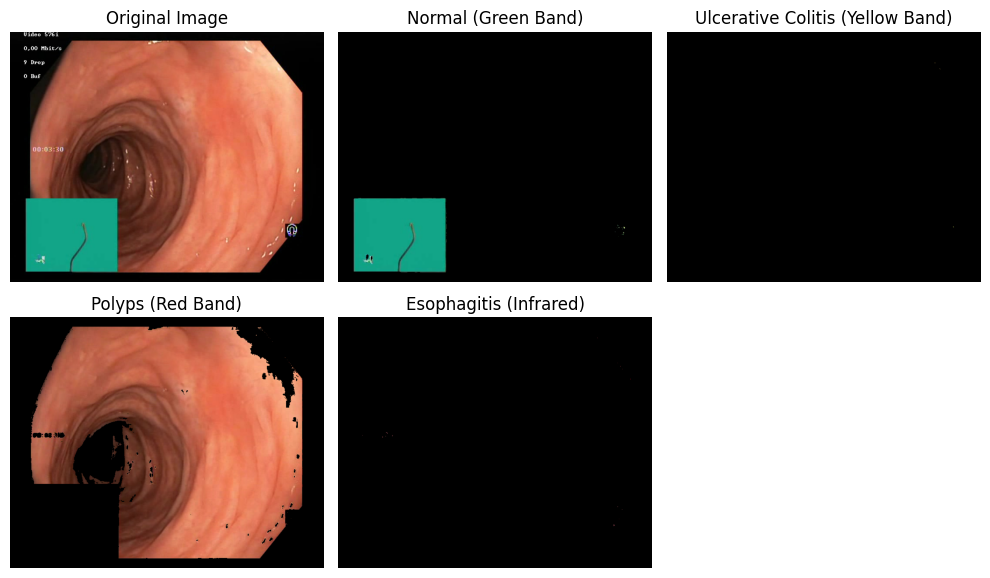

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
from torchvision import datasets, transforms
from sklearn.decomposition import PCA

# Set test data path
test_dir = r"/content/dataset/dataset1/test"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Select an image from the dataset
img_path, _ = test_dataset.samples[0]  # Pick the first image
original_img = cv2.imread(img_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Apply Narrow Band Imaging (NBI) filters
def apply_nbi_filter(image, band_range):
    lower_bound, upper_bound = band_range
    nbi_img = image.copy()

    # Convert to HSV for better color filtering
    hsv = cv2.cvtColor(nbi_img, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    filtered_img = cv2.bitwise_and(nbi_img, nbi_img, mask=mask)

    return filtered_img

# Define Narrow Band Imaging (NBI) wavelengths
nbi_filters = {
    "Normal (Green Band)": ((35, 50, 50), (90, 255, 255)),  # 500–550 nm
    "Ulcerative Colitis (Yellow Band)": ((20, 100, 100), (40, 255, 255)),  # 550–600 nm
    "Polyps (Red Band)": ((0, 120, 70), (10, 255, 255)),  # 600–650 nm
    "Esophagitis (Infrared)": ((170, 120, 70), (180, 255, 255))  # 650–700 nm
}

# Plot original and filtered images
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis("off")

for i, (condition, band) in enumerate(nbi_filters.items(), start=2):
    plt.subplot(2, 3, i)
    nbi_img = apply_nbi_filter(original_img, band)
    plt.imshow(nbi_img)
    plt.title(condition)
    plt.axis("off")

plt.tight_layout()
plt.show()


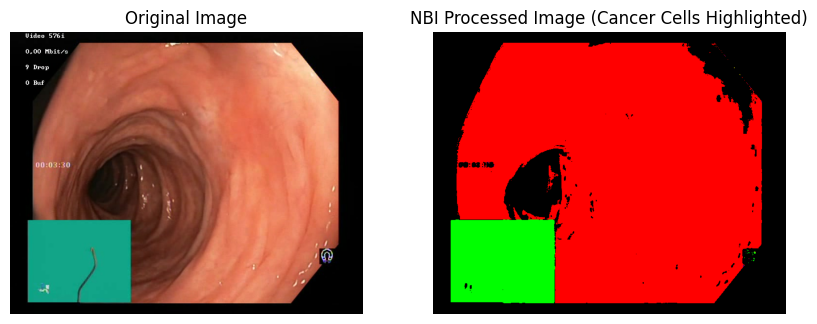

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
from torchvision import datasets, transforms

# Set test data path
test_dir = r"/content/dataset/dataset1/test"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Select an image from the dataset
img_path, _ = test_dataset.samples[0]  # Pick the first image
original_img = cv2.imread(img_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Function to apply Narrow Band Imaging (NBI) filtering
def apply_nbi_filter(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)  # Convert to HSV for wavelength filtering

    # Define color masks for different cancer types
    masks = {
        "Normal (Green Band)": cv2.inRange(hsv, (35, 50, 50), (90, 255, 255)),  # 500–550 nm
        "Ulcerative Colitis (Yellow Band)": cv2.inRange(hsv, (20, 100, 100), (40, 255, 255)),  # 550–600 nm
        "Polyps (Red Band)": cv2.inRange(hsv, (0, 120, 70), (10, 255, 255)),  # 600–650 nm
        "Esophagitis (Infrared Band)": cv2.inRange(hsv, (170, 120, 70), (180, 255, 255))  # 650–700 nm
    }

    # Create an NBI image where each condition is highlighted
    nbi_img = np.zeros_like(image)

    for i, (condition, mask) in enumerate(masks.items()):
        color_map = [(0, 255, 0), (255, 255, 0), (255, 0, 0), (128, 0, 128)]  # Green, Yellow, Red, Purple
        nbi_img[mask > 0] = color_map[i]  # Apply the color

    return nbi_img

# Apply NBI processing
nbi_image = apply_nbi_filter(original_img)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(nbi_image)
plt.title("NBI Processed Image (Cancer Cells Highlighted)")
plt.axis("off")

plt.show()


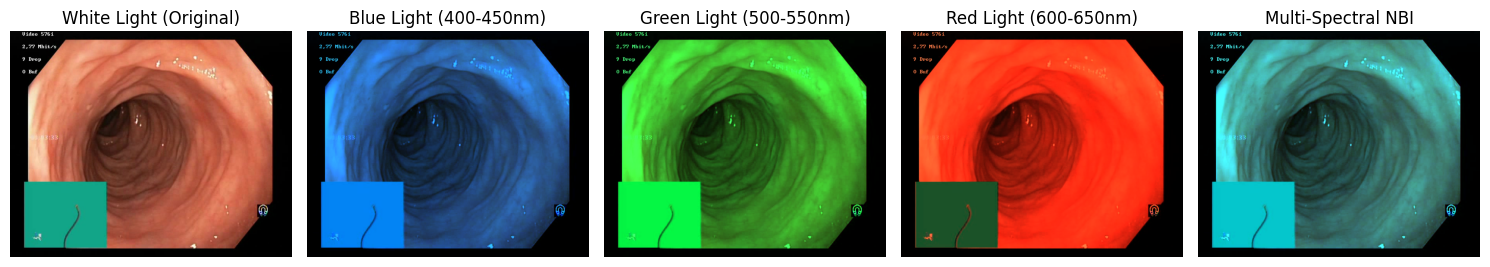

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/dataset/dataset1/test/0_normal/test_normal_ (70).jpg"  # Update path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Function to apply NBI filter for different wavelength simulations
def apply_nbi(image, red_factor, green_factor, blue_factor):
    nbi_image = image.copy()
    nbi_image[:, :, 0] = (nbi_image[:, :, 0] * red_factor).clip(0, 255).astype(np.uint8)  # Red Channel
    nbi_image[:, :, 1] = (nbi_image[:, :, 1] * green_factor).clip(0, 255).astype(np.uint8)  # Green Channel
    nbi_image[:, :, 2] = (nbi_image[:, :, 2] * blue_factor).clip(0, 255).astype(np.uint8)  # Blue Channel
    return nbi_image

# Define different wavelength simulations (tuned for medical imaging)
wavelengths = {
    "Blue Light (400-450nm)": (0.2, 0.8, 1.8),  # Enhances Blue for deep tissue contrast
    "Green Light (500-550nm)": (0.3, 1.5, 0.5),  # Enhances Green for vascular structures
    "Red Light (600-650nm)": (1.5, 0.5, 0.3),  # Enhances Red for deeper penetration
    "Multi-Spectral NBI": (0.3, 1.2, 1.5)  # Balanced NBI effect
}

# Plot Original vs. Different NBI Simulations
fig, axes = plt.subplots(1, len(wavelengths) + 1, figsize=(15, 5))

# Show Original Image
axes[0].imshow(image)
axes[0].set_title("White Light (Original)")
axes[0].axis("off")

# Apply different NBI filters
for i, (name, factors) in enumerate(wavelengths.items()):
    nbi_image = apply_nbi(image, *factors)
    axes[i + 1].imshow(nbi_image)
    axes[i + 1].set_title(name)
    axes[i + 1].axis("off")

plt.tight_layout()
plt.show()


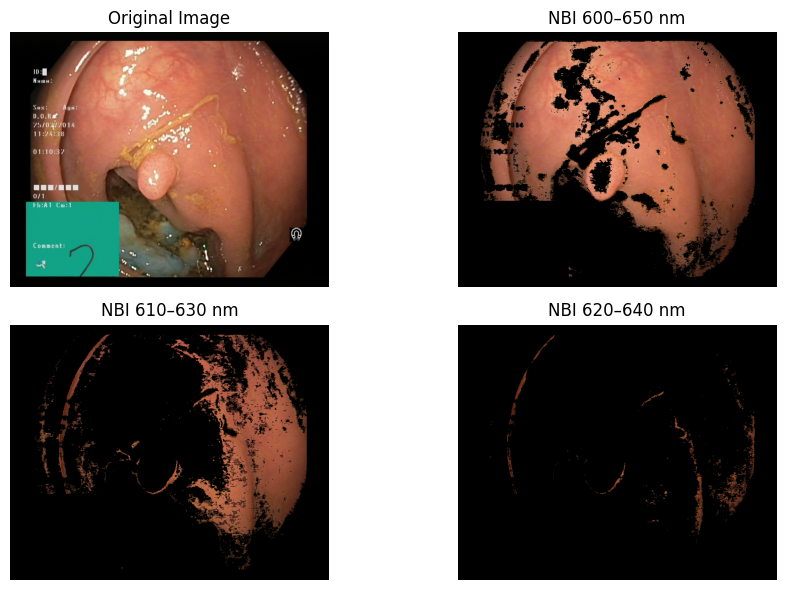

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Path to a specific polyp image
img_path = r"/content/dataset/dataset1/test/2_polyps/test_polyps_ (102).jpg"

# Load the image
original_img = cv2.imread(img_path)
if original_img is None:
    raise FileNotFoundError(f"Could not load image: {img_path}")

# Convert BGR (OpenCV default) to RGB
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Define different narrow bands for polyp detection (600–650 nm variations)
polyp_bandwidths = {
    "600–650 nm": ((0, 120, 70), (10, 255, 255)),  # Standard red band
    "610–630 nm": ((0, 150, 80), (10, 255, 200)),  # Slightly shifted band
    "620–640 nm": ((0, 170, 90), (10, 255, 255)),  # More focused on deeper tissue
}

# Function to apply NBI for polyp detection at different bands
def apply_nbi_filter(image, band_range):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)  # Convert to HSV for filtering
    lower_bound, upper_bound = band_range
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    filtered_img = cv2.bitwise_and(image, image, mask=mask)
    return filtered_img

# Plot original and filtered images for different bands
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis("off")

for i, (band_label, band_range) in enumerate(polyp_bandwidths.items(), start=2):
    plt.subplot(2, 2, i)
    nbi_img = apply_nbi_filter(original_img, band_range)
    plt.imshow(nbi_img)
    plt.title(f"NBI {band_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


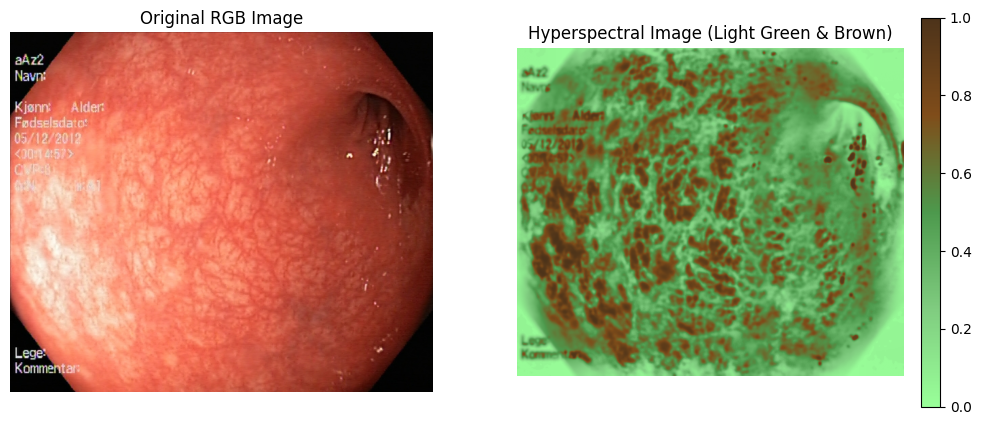

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import exposure

# Load the RGB image
image_path = "/content/dataset/dataset1/train/1_ulcerative_colitis/train_ulcer_ (51).jpg"  # Change to your actual image path
rgb_image = cv2.imread(image_path)

# Check if the image is loaded correctly
if rgb_image is None:
    raise ValueError("Error: Unable to load image. Check the file path!")

# Convert BGR (OpenCV default) to RGB
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Normalize the image to range [0,1]
rgb_image = rgb_image / 255.0

# Extract RGB channels
r, g, b = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]

# Generate a single synthetic hyperspectral band using a weighted sum
hyperspectral_band = 0.5 * r + 0.3 * g + 0.2 * b

# Apply Gaussian smoothing for spectral consistency
hyperspectral_band = gaussian_filter(hyperspectral_band, sigma=2)

# Normalize the hyperspectral band to [0, 1]
hyperspectral_band = (hyperspectral_band - hyperspectral_band.min()) / (hyperspectral_band.max() - hyperspectral_band.min())

# Apply contrast enhancement using Adaptive Histogram Equalization (CLAHE)
hyperspectral_band = exposure.equalize_adapthist(hyperspectral_band, clip_limit=0.03)

# Create a custom colormap for light green background and brown disease spots
from matplotlib.colors import LinearSegmentedColormap

colors = [(0.6, 1.0, 0.6),  # Light Green (Healthy)
          (0.5, 0.8, 0.5),  # Slightly Darker Green
          (0.3, 0.6, 0.3),  # Deeper Green
          (0.5, 0.3, 0.1),  # Brown (Disease)
          (0.3, 0.2, 0.1)]  # Dark Brown (Severe Disease)

custom_cmap = LinearSegmentedColormap.from_list("custom_hyperspectral", colors, N=256)

# Display the original RGB image and the enhanced hyperspectral band
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Show the RGB image
axes[0].imshow(rgb_image)
axes[0].set_title("Original RGB Image")
axes[0].axis("off")

# Show the enhanced hyperspectral band with custom colormap
im = axes[1].imshow(hyperspectral_band, cmap=custom_cmap)
axes[1].set_title("Hyperspectral Image (Light Green & Brown)")
axes[1].axis("off")

# Add colorbar for hyperspectral band
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

plt.show()

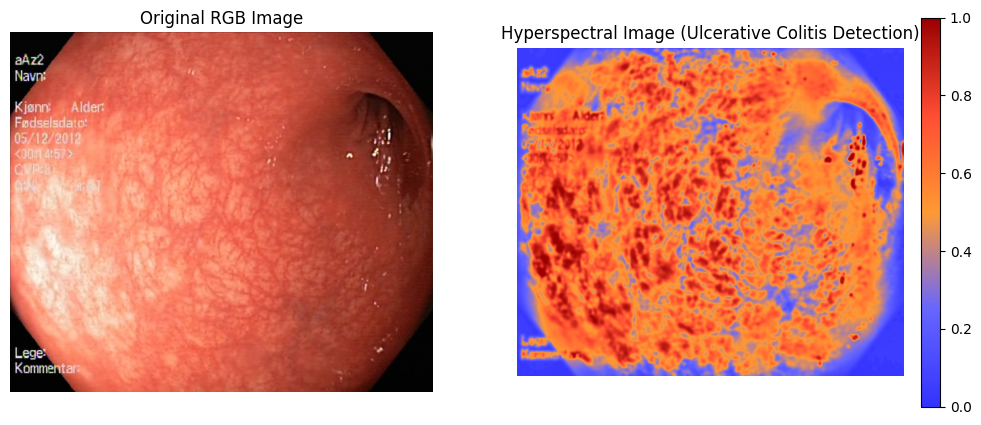

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import exposure
from matplotlib.colors import LinearSegmentedColormap

# Load the RGB image
image_path = "/content/dataset/dataset1/train/1_ulcerative_colitis/train_ulcer_ (51).jpg"  # Change this to your image path
rgb_image = cv2.imread(image_path)

# Check if the image is loaded correctly
if rgb_image is None:
    raise ValueError("Error: Unable to load image. Check the file path!")

# Convert BGR (OpenCV default) to RGB
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Normalize the image to range [0,1]
rgb_image = rgb_image / 255.0

# Extract RGB channels
r, g, b = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]

# Generate a single synthetic hyperspectral band for detecting Ulcerative Colitis
hyperspectral_band = 0.6 * r + 0.2 * g + 0.2 * b  # Higher red component emphasizes inflammation

# Apply Gaussian smoothing for spectral consistency
hyperspectral_band = gaussian_filter(hyperspectral_band, sigma=2)

# Normalize the hyperspectral band to [0, 1]
hyperspectral_band = (hyperspectral_band - hyperspectral_band.min()) / (hyperspectral_band.max() - hyperspectral_band.min())

# Apply contrast enhancement using Adaptive Histogram Equalization (CLAHE)
hyperspectral_band = exposure.equalize_adapthist(hyperspectral_band, clip_limit=0.03)

# Define a colormap for highlighting ulcerative colitis (blue for healthy, red for inflammation)
colors = [(0.2, 0.2, 1.0),  # Blue (Healthy)
          (0.4, 0.4, 1.0),  # Lighter Blue
          (1.0, 0.6, 0.2),  # Orange (Mild Inflammation)
          (1.0, 0.3, 0.2),  # Red (Moderate Inflammation)
          (0.6, 0.0, 0.0)]  # Dark Red (Severe Ulcerative Colitis)

custom_cmap = LinearSegmentedColormap.from_list("uc_hyperspectral", colors, N=256)

# Display the original RGB image and the enhanced hyperspectral band
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Show the RGB image
axes[0].imshow(rgb_image)
axes[0].set_title("Original RGB Image")
axes[0].axis("off")

# Show the enhanced hyperspectral band with custom colormap
im = axes[1].imshow(hyperspectral_band, cmap=custom_cmap)
axes[1].set_title("Hyperspectral Image (Ulcerative Colitis Detection)")
axes[1].axis("off")

# Add colorbar for hyperspectral band
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

plt.show()


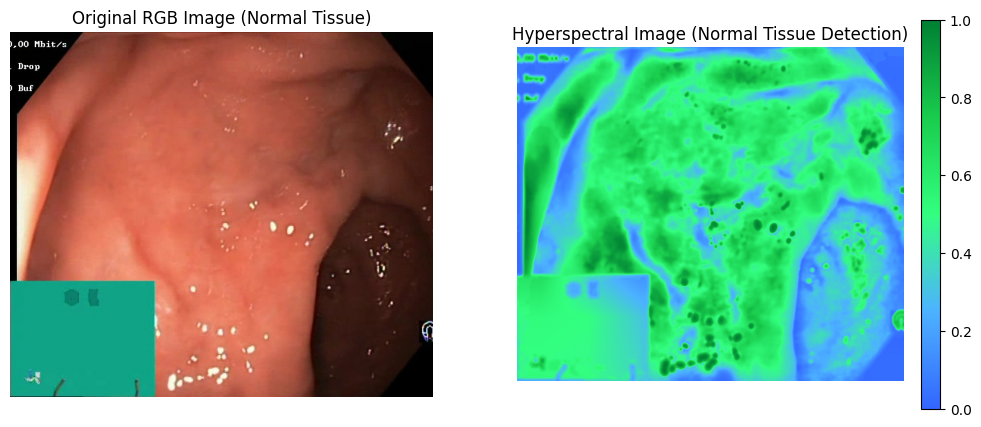

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import exposure
from matplotlib.colors import LinearSegmentedColormap

# Load the RGB image (Normal Tissue)
image_path = "/content/dataset/dataset1/train/0_normal/train_normal_ (1).jpg"  # Update with the actual path
rgb_image = cv2.imread(image_path)

# Check if the image is loaded correctly
if rgb_image is None:
    raise ValueError("Error: Unable to load image. Check the file path!")

# Convert BGR (OpenCV default) to RGB
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Normalize the image to range [0,1]
rgb_image = rgb_image / 255.0

# Extract RGB channels
r, g, b = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]

# Generate a single synthetic hyperspectral band for normal tissue detection
hyperspectral_band = 0.3 * r + 0.6 * g + 0.1 * b  # Emphasizing green for healthy tissue

# Apply Gaussian smoothing for spectral consistency
hyperspectral_band = gaussian_filter(hyperspectral_band, sigma=2)

# Normalize the hyperspectral band to [0, 1]
hyperspectral_band = (hyperspectral_band - hyperspectral_band.min()) / (hyperspectral_band.max() - hyperspectral_band.min())

# Apply contrast enhancement using Adaptive Histogram Equalization (CLAHE)
hyperspectral_band = exposure.equalize_adapthist(hyperspectral_band, clip_limit=0.03)

# Define a colormap for highlighting normal tissue (Blue-Green)
colors = [(0.2, 0.4, 1.0),  # Light Blue (Very Healthy)
          (0.3, 0.7, 1.0),  # Cyan
          (0.2, 1.0, 0.5),  # Light Green
          (0.1, 0.8, 0.3),  # Green (Healthy)
          (0.0, 0.5, 0.2)]  # Dark Green (Deep Tissue)

custom_cmap = LinearSegmentedColormap.from_list("normal_hyperspectral", colors, N=256)

# Display the original RGB image and the enhanced hyperspectral band
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Show the RGB image
axes[0].imshow(rgb_image)
axes[0].set_title("Original RGB Image (Normal Tissue)")
axes[0].axis("off")

# Show the enhanced hyperspectral band with custom colormap
im = axes[1].imshow(hyperspectral_band, cmap=custom_cmap)
axes[1].set_title("Hyperspectral Image (Normal Tissue Detection)")
axes[1].axis("off")

# Add colorbar for hyperspectral band
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

plt.show()


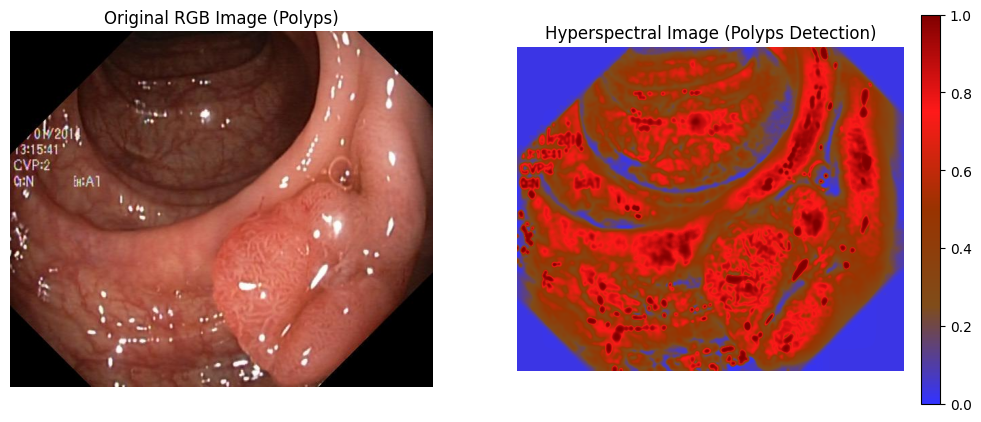

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import exposure
from matplotlib.colors import LinearSegmentedColormap

# Load the RGB image (Polyps)
image_path = "/content/dataset/dataset1/train/2_polyps/train_polyps_ (106).jpg"  # Update with the actual path
rgb_image = cv2.imread(image_path)

# Check if the image is loaded correctly
if rgb_image is None:
    raise ValueError("Error: Unable to load image. Check the file path!")

# Convert BGR (OpenCV default) to RGB
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Normalize the image to range [0,1]
rgb_image = rgb_image / 255.0

# Extract RGB channels
r, g, b = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]

# Generate a single synthetic hyperspectral band for polyp detection
hyperspectral_band = 0.7 * r + 0.2 * g + 0.1 * b  # Higher red component for polyp detection

# Apply Gaussian smoothing for spectral consistency
hyperspectral_band = gaussian_filter(hyperspectral_band, sigma=2)

# Normalize the hyperspectral band to [0, 1]
hyperspectral_band = (hyperspectral_band - hyperspectral_band.min()) / (hyperspectral_band.max() - hyperspectral_band.min())

# Apply contrast enhancement using Adaptive Histogram Equalization (CLAHE)
hyperspectral_band = exposure.equalize_adapthist(hyperspectral_band, clip_limit=0.03)

# Define a colormap for highlighting polyps (Red & Brown)
colors = [(0.2, 0.2, 1.0),  # Blue (Healthy Tissue)
          (0.5, 0.3, 0.1),  # Light Brown (Mild Polyps)
          (0.6, 0.2, 0.0),  # Orange-Brown (Moderate Polyps)
          (1.0, 0.1, 0.1),  # Bright Red (Severe Polyps)
          (0.5, 0.0, 0.0)]  # Dark Red (Deep Polyps)

custom_cmap = LinearSegmentedColormap.from_list("polyps_hyperspectral", colors, N=256)

# Display the original RGB image and the enhanced hyperspectral band
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Show the RGB image
axes[0].imshow(rgb_image)
axes[0].set_title("Original RGB Image (Polyps)")
axes[0].axis("off")

# Show the enhanced hyperspectral band with custom colormap
im = axes[1].imshow(hyperspectral_band, cmap=custom_cmap)
axes[1].set_title("Hyperspectral Image (Polyps Detection)")
axes[1].axis("off")

# Add colorbar for hyperspectral band
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

plt.show()


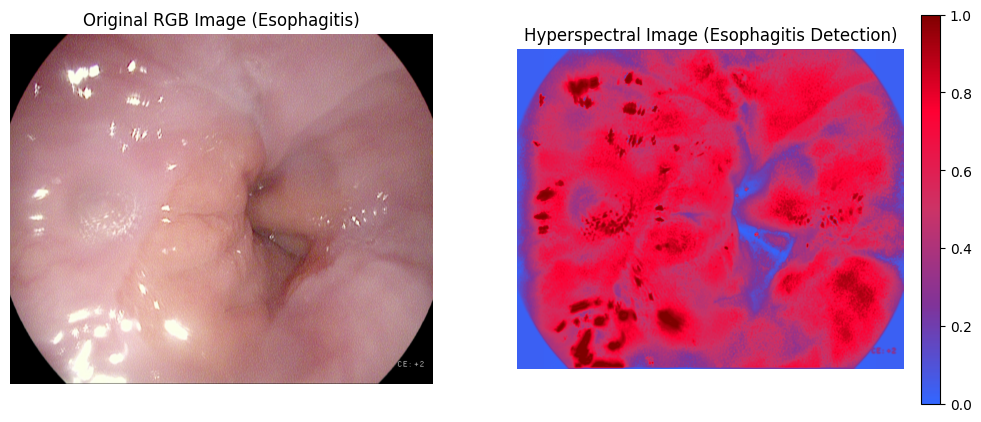

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import exposure
from matplotlib.colors import LinearSegmentedColormap

# Load the RGB image (Esophagitis)
image_path = "/content/dataset/dataset1/train/3_esophagitis/train_esophagitis_ (127).jpg"  # Update with the actual path
rgb_image = cv2.imread(image_path)

# Check if the image is loaded correctly
if rgb_image is None:
    raise ValueError("Error: Unable to load image. Check the file path!")

# Convert BGR (OpenCV default) to RGB
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Normalize the image to range [0,1]
rgb_image = rgb_image / 255.0

# Extract RGB channels
r, g, b = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]

# Generate a single synthetic hyperspectral band for Esophagitis detection
hyperspectral_band = 0.6 * r + 0.3 * g + 0.1 * b  # High red & some green for esophageal inflammation

# Apply Gaussian smoothing for spectral consistency
hyperspectral_band = gaussian_filter(hyperspectral_band, sigma=2)

# Normalize the hyperspectral band to [0, 1]
hyperspectral_band = (hyperspectral_band - hyperspectral_band.min()) / (hyperspectral_band.max() - hyperspectral_band.min())

# Apply contrast enhancement using Adaptive Histogram Equalization (CLAHE)
hyperspectral_band = exposure.equalize_adapthist(hyperspectral_band, clip_limit=0.03)

# Define a colormap for highlighting esophagitis (Red & Purple)
colors = [(0.2, 0.4, 1.0),  # Blue (Healthy Tissue)
          (0.5, 0.2, 0.6),  # Purple (Mild Esophagitis)
          (0.8, 0.2, 0.4),  # Magenta (Moderate Inflammation)
          (1.0, 0.0, 0.2),  # Bright Red (Severe Esophagitis)
          (0.5, 0.0, 0.0)]  # Dark Red (Deep Tissue Damage)

custom_cmap = LinearSegmentedColormap.from_list("esophagitis_hyperspectral", colors, N=256)

# Display the original RGB image and the enhanced hyperspectral band
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Show the RGB image
axes[0].imshow(rgb_image)
axes[0].set_title("Original RGB Image (Esophagitis)")
axes[0].axis("off")

# Show the enhanced hyperspectral band with custom colormap
im = axes[1].imshow(hyperspectral_band, cmap=custom_cmap)
axes[1].set_title("Hyperspectral Image (Esophagitis Detection)")
axes[1].axis("off")

# Add colorbar for hyperspectral band
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

plt.show()


<ipython-input-22-29672b5a8217>:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


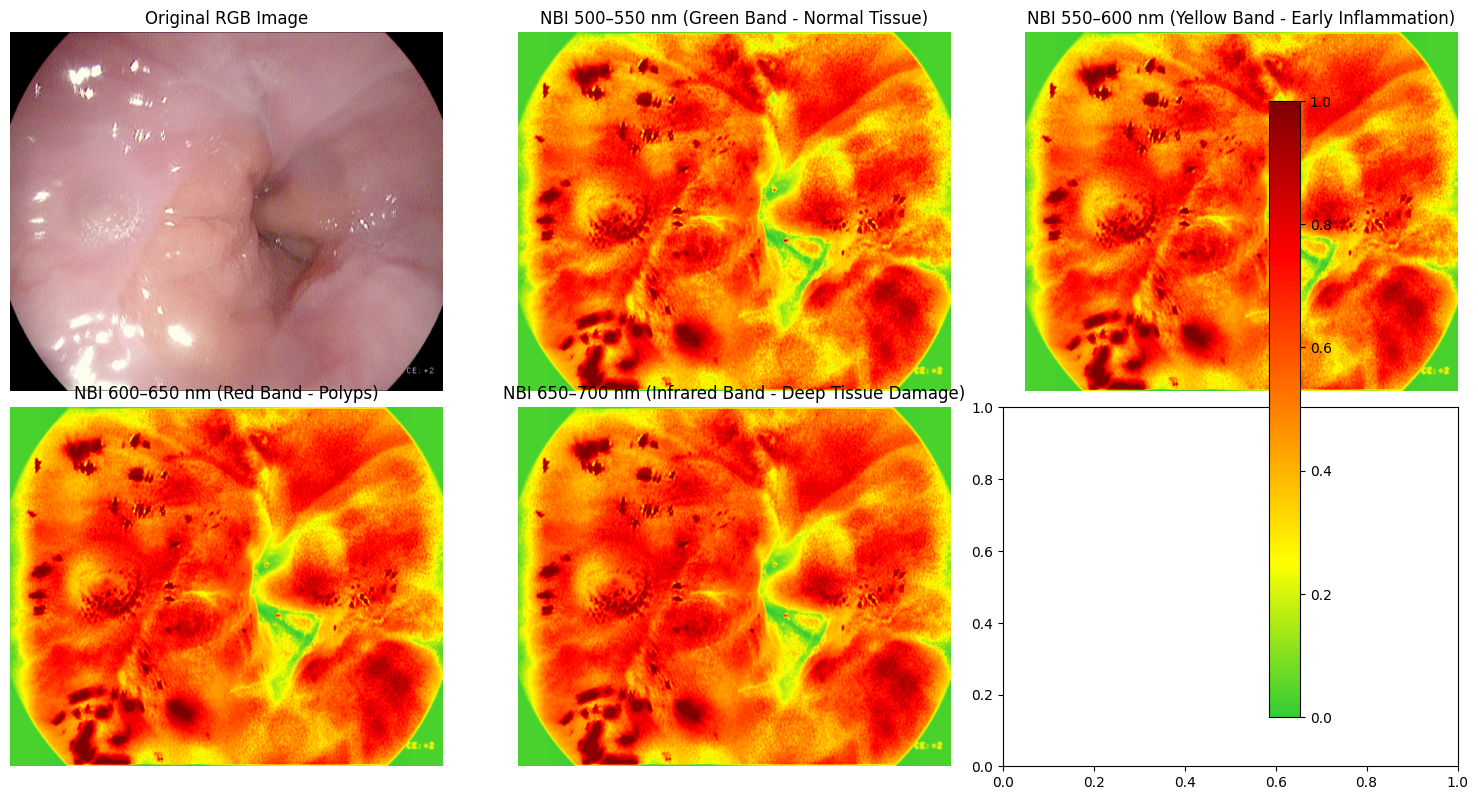

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import exposure
from matplotlib.colors import LinearSegmentedColormap

# Load the RGB image (Suspected Cancer Tissue)
image_path = "/content/dataset/dataset1/train/3_esophagitis/train_esophagitis_ (127).jpg"  # Update with actual path
rgb_image = cv2.imread(image_path)

# Check if the image is loaded correctly
if rgb_image is None:
    raise ValueError("Error: Unable to load image. Check the file path!")

# Convert BGR (OpenCV default) to RGB
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Normalize the image to range [0,1]
rgb_image = rgb_image / 255.0

# Extract RGB channels
r, g, b = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]

# Define different narrow bands to test for cancer detection
bandwidths = {
    "500–550 nm (Green Band - Normal Tissue)": 0.3 * r + 0.6 * g + 0.1 * b,
    "550–600 nm (Yellow Band - Early Inflammation)": 0.4 * r + 0.5 * g + 0.1 * b,
    "600–650 nm (Red Band - Polyps)": 0.6 * r + 0.3 * g + 0.1 * b,
    "650–700 nm (Infrared Band - Deep Tissue Damage)": 0.7 * r + 0.2 * g + 0.1 * b
}

# Apply Gaussian smoothing and contrast enhancement
filtered_images = {}
for label, band in bandwidths.items():
    band = gaussian_filter(band, sigma=2)  # Smooth spectral inconsistencies
    band = (band - band.min()) / (band.max() - band.min())  # Normalize
    band = exposure.equalize_adapthist(band, clip_limit=0.03)  # Enhance contrast
    filtered_images[label] = band  # Store the processed image

# Define colormap for cancerous regions (Healthy: Green | Infected: Red)
colors = [(0.2, 0.8, 0.2),  # Green (Healthy Tissue)
          (1.0, 1.0, 0.0),  # Yellow (Early Warning)
          (1.0, 0.5, 0.0),  # Orange (Moderate Cancer)
          (1.0, 0.0, 0.0),  # Bright Red (Severe Cancer)
          (0.5, 0.0, 0.0)]  # Dark Red (Advanced Stage)

custom_cmap = LinearSegmentedColormap.from_list("cancer_detection", colors, N=256)

# Display the original image and different bandwidth images
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Show the original image
axes[0, 0].imshow(rgb_image)
axes[0, 0].set_title("Original RGB Image")
axes[0, 0].axis("off")

# Show the different narrow band images
for i, (label, img) in enumerate(filtered_images.items(), start=1):
    ax = axes[i // 3, i % 3]  # Arrange in grid
    im = ax.imshow(img, cmap=custom_cmap)
    ax.set_title(f"NBI {label}")
    ax.axis("off")

# Add colorbar for reference
fig.colorbar(im, ax=axes, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


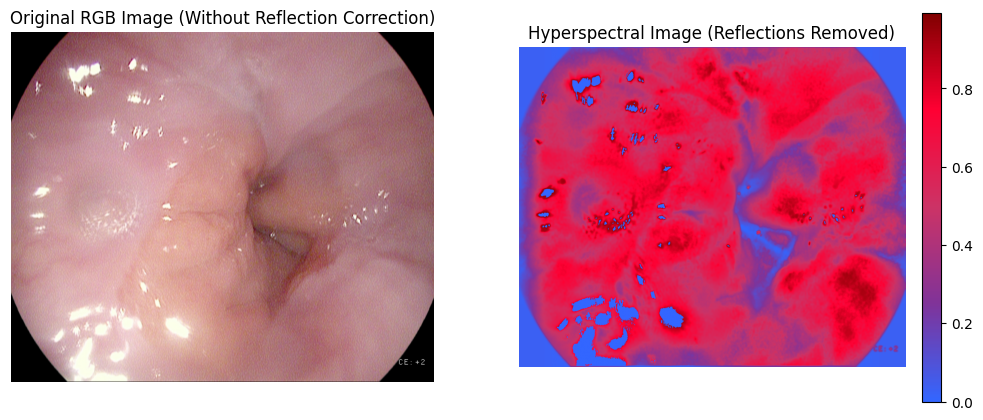

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import exposure
from matplotlib.colors import LinearSegmentedColormap

# Load the RGB image
image_path = "/content/dataset/dataset1/train/3_esophagitis/train_esophagitis_ (127).jpg"  # Change this to your actual path
rgb_image = cv2.imread(image_path)

# Check if the image is loaded correctly
if rgb_image is None:
    raise ValueError("Error: Unable to load image. Check the file path!")

# Convert BGR (OpenCV default) to RGB
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Normalize the image to range [0,1]
rgb_image = rgb_image / 255.0

# Convert image to grayscale for reflection detection
gray_image = cv2.cvtColor((rgb_image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

# Detect bright reflection areas (Thresholding)
_, reflection_mask = cv2.threshold(gray_image, 220, 255, cv2.THRESH_BINARY)  # Threshold >220 to detect bright spots

# Use bilateral filtering to smooth out reflections while preserving edges
filtered_image = cv2.bilateralFilter((rgb_image * 255).astype(np.uint8), 9, 75, 75)
filtered_image = filtered_image / 255.0  # Normalize back

# Extract RGB channels
r, g, b = filtered_image[:, :, 0], filtered_image[:, :, 1], filtered_image[:, :, 2]

# Generate a hyperspectral band for esophagitis detection (Red & Infrared)
hyperspectral_band = 0.6 * r + 0.3 * g + 0.1 * b  # Prioritizing red and near-infrared

# Apply Gaussian smoothing for spectral consistency
hyperspectral_band = gaussian_filter(hyperspectral_band, sigma=2)

# Normalize the hyperspectral band to [0, 1]
hyperspectral_band = (hyperspectral_band - hyperspectral_band.min()) / (hyperspectral_band.max() - hyperspectral_band.min())

# Apply contrast enhancement using CLAHE
hyperspectral_band = exposure.equalize_adapthist(hyperspectral_band, clip_limit=0.03)

# Apply the reflection mask (Ignore bright areas)
hyperspectral_band[reflection_mask > 0] = 0  # Set bright reflection areas to black

# Define a colormap for esophagitis (Healthy → Blue | Inflammation → Red)
colors = [(0.2, 0.4, 1.0),  # Blue (Healthy Tissue)
          (0.5, 0.2, 0.6),  # Purple (Mild Esophagitis)
          (0.8, 0.2, 0.4),  # Magenta (Moderate Inflammation)
          (1.0, 0.0, 0.2),  # Bright Red (Severe Esophagitis)
          (0.5, 0.0, 0.0)]  # Dark Red (Advanced Stage)

custom_cmap = LinearSegmentedColormap.from_list("esophagitis_hyperspectral", colors, N=256)

# Display the original image and enhanced hyperspectral band
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Show the RGB image
axes[0].imshow(rgb_image)
axes[0].set_title("Original RGB Image (Without Reflection Correction)")
axes[0].axis("off")

# Show the enhanced hyperspectral band with reflection removed
im = axes[1].imshow(hyperspectral_band, cmap=custom_cmap)
axes[1].set_title("Hyperspectral Image (Reflections Removed)")
axes[1].axis("off")

# Add colorbar for hyperspectral band
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

plt.show()


Select a bandwidth for NBI:
1. 500–550 nm (Green Band - Normal Tissue)
2. 550–600 nm (Yellow Band - Early Inflammation)
3. 600–650 nm (Red Band - Polyps)
4. 650–700 nm (Infrared Band - Deep Tissue Damage)
Enter the number corresponding to your choice: 1


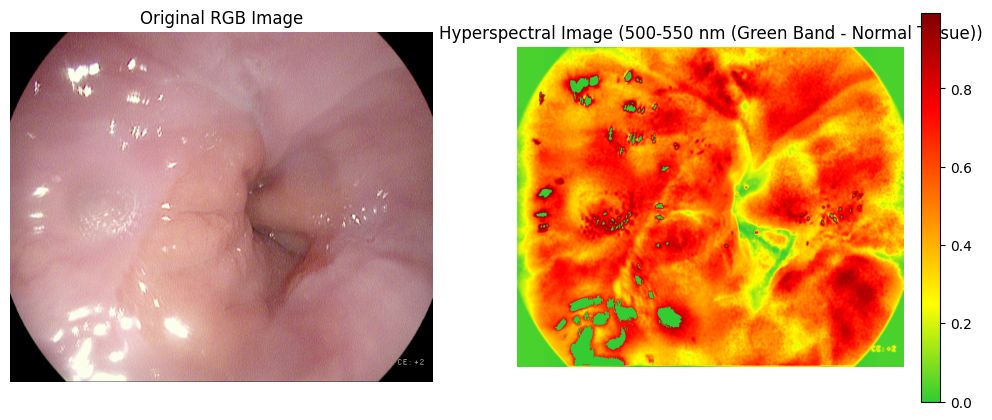

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import exposure
from matplotlib.colors import LinearSegmentedColormap

# Load the image (User can modify the path)
image_path = "/content/dataset/dataset1/train/3_esophagitis/train_esophagitis_ (127).jpg"  # Change as needed
rgb_image = cv2.imread(image_path)

# Check if the image is loaded correctly
if rgb_image is None:
    raise ValueError("Error: Unable to load image. Check the file path!")

# Convert BGR (OpenCV default) to RGB
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Normalize the image to range [0,1]
rgb_image = rgb_image / 255.0

# Convert image to grayscale for reflection detection
gray_image = cv2.cvtColor((rgb_image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

# Detect bright reflection areas (Thresholding)
_, reflection_mask = cv2.threshold(gray_image, 220, 255, cv2.THRESH_BINARY)  # Threshold >220 detects bright spots

# Apply bilateral filtering to smooth reflections while preserving edges
filtered_image = cv2.bilateralFilter((rgb_image * 255).astype(np.uint8), 9, 75, 75)
filtered_image = filtered_image / 255.0  # Normalize back

# Extract RGB channels
r, g, b = filtered_image[:, :, 0], filtered_image[:, :, 1], filtered_image[:, :, 2]

# User selects the bandwidth range (Interactive)
print("Select a bandwidth for NBI:")
print("1. 500–550 nm (Green Band - Normal Tissue)")
print("2. 550–600 nm (Yellow Band - Early Inflammation)")
print("3. 600–650 nm (Red Band - Polyps)")
print("4. 650–700 nm (Infrared Band - Deep Tissue Damage)")

choice = int(input("Enter the number corresponding to your choice: "))

# Assign hyperspectral band weights based on user selection
band_mapping = {
    1: (0.3 * r + 0.6 * g + 0.1 * b, "500-550 nm (Green Band - Normal Tissue)"),
    2: (0.4 * r + 0.5 * g + 0.1 * b, "550-600 nm (Yellow Band - Early Inflammation)"),
    3: (0.6 * r + 0.3 * g + 0.1 * b, "600-650 nm (Red Band - Polyps)"),
    4: (0.7 * r + 0.2 * g + 0.1 * b, "650-700 nm (Infrared Band - Deep Tissue Damage)")
}

if choice not in band_mapping:
    raise ValueError("Invalid selection! Please choose a number between 1-4.")

hyperspectral_band, band_label = band_mapping[choice]

# Apply Gaussian smoothing for spectral consistency
hyperspectral_band = gaussian_filter(hyperspectral_band, sigma=2)

# Normalize the hyperspectral band to [0, 1]
hyperspectral_band = (hyperspectral_band - hyperspectral_band.min()) / (hyperspectral_band.max() - hyperspectral_band.min())

# Apply contrast enhancement using Adaptive Histogram Equalization (CLAHE)
hyperspectral_band = exposure.equalize_adapthist(hyperspectral_band, clip_limit=0.03)

# Apply the reflection mask (Ignore bright areas)
hyperspectral_band[reflection_mask > 0] = 0  # Set bright reflection areas to black

# Define a colormap for cancer detection (Green → Healthy | Red → Cancerous)
colors = [(0.2, 0.8, 0.2),  # Green (Healthy Tissue)
          (1.0, 1.0, 0.0),  # Yellow (Early Inflammation)
          (1.0, 0.5, 0.0),  # Orange (Moderate Cancer)
          (1.0, 0.0, 0.0),  # Bright Red (Severe Cancer)
          (0.5, 0.0, 0.0)]  # Dark Red (Advanced Stage)

custom_cmap = LinearSegmentedColormap.from_list("cancer_detection", colors, N=256)

# Display the original image and enhanced hyperspectral band
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Show the RGB image
axes[0].imshow(rgb_image)
axes[0].set_title("Original RGB Image")
axes[0].axis("off")

# Show the enhanced hyperspectral band with user-selected bandwidth
im = axes[1].imshow(hyperspectral_band, cmap=custom_cmap)
axes[1].set_title(f"Hyperspectral Image ({band_label})")
axes[1].axis("off")

# Add colorbar for hyperspectral band
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

plt.show()
